# EN.553.436/636 Exam 2 (25 pts.)
## Guidelines
- Complete the exam within a 75-minute time interval between 7AM and 9PM.
- Your start time begins when you begin reading the exam.
- Upload your IPYNB and PDF to Gradescope before 9PM.
- <font color='red'>Make sure all code and comments are visible in your PDF. Use line breaks if necessary. Make sure your problems are marked in Gradescope. Make sure your submission has normal page breaks and is not one long page. Failure to follow these guidelines may result in your problems not being graded.</font>
- Write your start and end times below.

## Start Time:
## End Time:

## The Dataset

Throughout this exam, we will analyze the following artifical dataset with two clusters. Run the cell below.

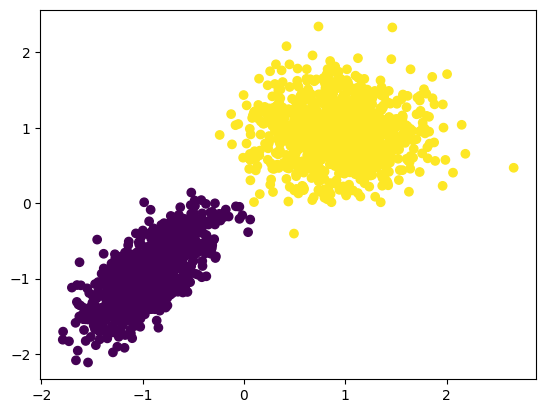

(2000, 2)


In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('ex2.csv')
X = np.array(data.iloc[:,:2]) 
c = np.array(data.iloc[:,2])

plt.scatter(X[:,0], X[:,1], c=c)
plt.show()
print(X.shape)

## 1 (10 pts.)
Run the following code, which attempts to perform clustering on the dataset. Note that the code contains a mistake on exactly one line.

### 1.1 (5 pts.)
State the name of the method being implemented, and comment on the indicated lines to explain the purpose of the code blocks. 

### 1.2 (5 pts.)
Correct the one wrong line of code. Place an explanatory comment next to your correction.

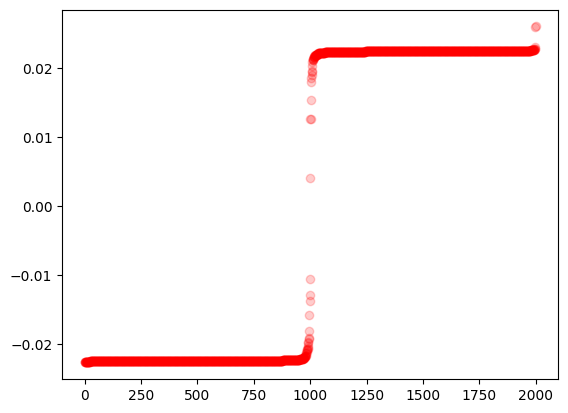

[1 1 1 ... 0 0 0]


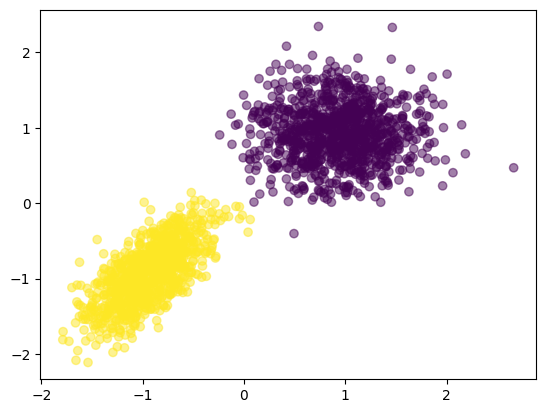

In [33]:
# NAME OF THE METHOD BEING IMPLEMENTED: Spectral clustering.

# Form distance matrix.
temp_1 = X[np.newaxis, :, :]
temp_2 = X[:, np.newaxis, :]
dif = temp_1 - temp_2
dif_sq = dif * dif
dist = np.sqrt(dif_sq.sum(axis=2))

# Form adjacency matrix.
adj = (dist<0.7)
np.fill_diagonal(adj, False)
adj = adj.astype(np.float32)

# Form Laplacian matrix.
deg = adj.sum(axis=0)
deg = np.diag(deg)
lap = deg - adj

# Plot components of eigenvector with index `ind`.
_, vec = np.linalg.eigh(lap)
ind = 1 # Here is the correction. Use second smallest eigenvector.
plt.plot(np.sort(vec[:,ind]), 'ro', alpha=0.2)
plt.show()

# Cluster points according to whether corresponding eigenvector 
# components are below threshold `thresh`.
thresh = 0
c = (vec[:,ind] < thresh).astype(int)
print(c)
plt.scatter(X[:,0], X[:,1], c=c, alpha=0.5)
plt.show()

## 2 (10 pts.)
Run the following code, which attempts to perform clustering on dataset using another method. Note that the code contains an omission in exactly one block.

### 2.1 (5 pts.)
State the name of the method being implemented, and comment on the indicated lines to explain the purpose of the code blocks. 

### 2.2 (5 pts.)
Complete the missing code in exactly one block. Place an explanatory comment next to your correction. Do not change any existing lines of code, and do not add code to more than one block. It is possible to complete this part by writing exactly one line, but you are free to write multiple lines.

0


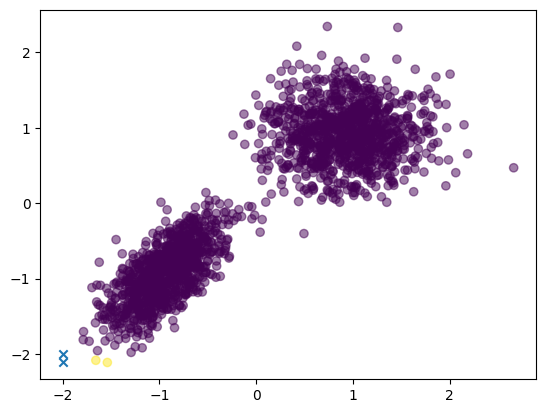

1


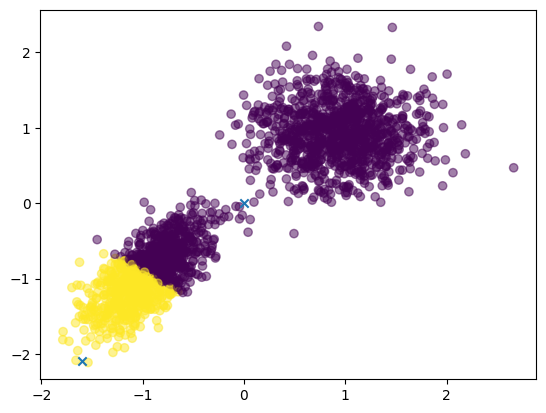

2


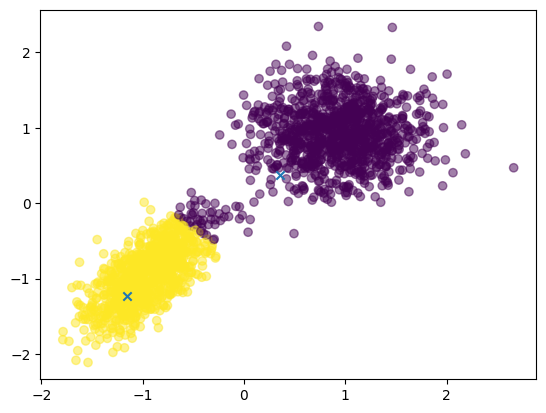

3


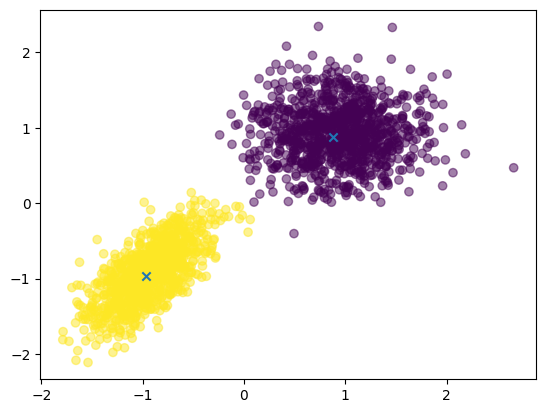

4


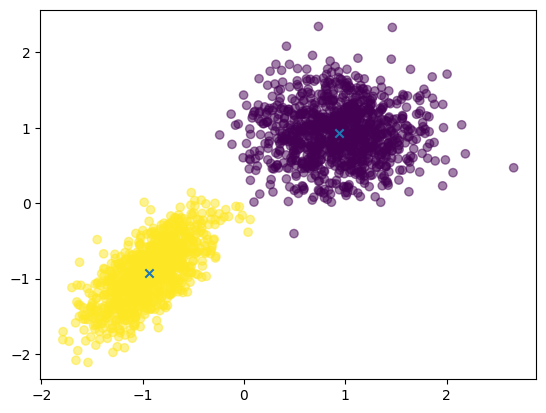

In [34]:
# NAME OF THE METHOD BEING IMPLEMENTED: KMeans clustering.

# Set initial centers.
cen = np.array([[-2,-2.1], [-2,-2]])

for n_iter in range(10):
    print(n_iter)
    clus0 = []
    clus1 = []
    
    for i in range(X.shape[0]):
        # Calculate distances of point to centers.
        d0 = np.linalg.norm(X[i,:] - cen[0,:])
        d1 = np.linalg.norm(X[i,:] - cen[1,:])
        
        # Assign point to cluster with nearest center.
        if  d0 < d1:
            clus0.append(i)
        else:
            clus1.append(i)
    
    # Plot resulting clusters.
    c = np.isin(np.arange(X.shape[0]), clus0)
    plt.scatter(X[:,0], X[:,1], c=c, alpha=0.5)
    plt.scatter(cen[:,0], cen[:,1], marker='x')
    plt.show()
    
    # Store last center estimate.
    prev_cen = cen
    # Update center estimate.
    cen = np.array([np.mean(X[clus0,:], axis=0), 
                    np.mean(X[clus1,:], axis=0)])
    
    # Break if center estimates do not change substantially.
    if np.linalg.norm(prev_cen - cen) < 1e-3:
        break

## 3 (5 pts.)
The dataset appears to consist of two Gaussian clusters. Assume this is true, and print estimates of the Gaussian cluster mean vectors and covariance matrices. You may import any package used in class.

In [35]:
from sklearn.mixture import GaussianMixture as GMM
clus = GMM(n_components=2).fit(X)
print('Means')
print(clus.means_[0])
print(clus.means_[1])
print('Covariances')
print(clus.covariances_[0])
print(clus.covariances_[1])

Means
[0.93423541 0.92441168]
[-0.93396288 -0.92414201]
Covariances
[[0.16689214 0.00052023]
 [0.00052023 0.14615709]]
[[0.08803897 0.07837624]
 [0.07837624 0.14526971]]


## 4 (10 pts.)
The previous sections treated X as unlabeled data for clustering. In this problem we will use the provided labels to perform classification

1. First, split the data into 80% training and 20% testing. 
2. Then, using only the training data, train a linear discriminant analysis classifier, gaussian naive bayes classifier, decision tree classifier (with depth 3), and random forest classifier (with depth 3 and 16 estimators). 
3. Evaluate the training and test accuracy for each method

In [36]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split

data = pd.read_csv('music_scaled.csv')
data_turkey = data[data['Country'] == 'Turkey']
data_india = data[data['Country'] == 'India']
data = pd.concat([data_turkey, data_india])

X = np.array(data.iloc[:, 0:68].values)
c = np.array(data['Country'].map({'Turkey': 0, 'India': 1}))
inds = np.random.permutation(len(X))
X = X[inds]
c = c[inds]

print(X.shape)
print(X)
print(c.shape)
print(c)


(133, 68)
[[ 1.74260482e+00  1.50409339e+00  1.75707651e-01 ... -2.05583444e-01
  -7.19278094e-01 -4.57561379e-01]
 [ 1.47491719e-02  2.43484524e-01 -3.37178888e-01 ...  3.79917622e-01
  -6.56481641e-01  3.79159142e-04]
 [-1.43022162e+00 -1.24479947e+00  3.57384233e+00 ... -8.07122738e-01
  -8.87079328e-01 -8.71917012e-01]
 ...
 [-2.43935831e-01 -2.26622766e-01 -5.33884107e-01 ... -6.27410796e-01
  -4.39658187e-01 -8.66858103e-01]
 [-6.76006837e-01 -7.19601665e-01  1.27215462e+00 ... -6.85041697e-01
  -1.15695436e+00 -9.04851582e-01]
 [ 1.85927977e+00  2.37008659e+00  3.60020258e-01 ... -6.28618651e-01
  -5.02031122e-01 -4.00978496e-01]]
(133,)
[1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0
 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1
 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1]


In [37]:
X_train, X_test, c_train, c_test = train_test_split(X, c, test_size=0.2, random_state=0)

# NAME OF THE METHOD BEING IMPLEMENTED: Linear discriminant analysis.
lda = LDA().fit(X_train, c_train)
print('LDA')
print('Training accuracy: ', lda.score(X_train, c_train))
print('Test accuracy    : ', lda.score(X_test, c_test))

# NAME OF THE METHOD BEING IMPLEMENTED: Gaussian naive bayes.
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, c_train)
print('\nGaussian naive bayes')
print('Training accuracy: ', gnb.score(X_train, c_train))
print('Test accuracy    : ', gnb.score(X_test, c_test))

# NAME OF THE METHOD BEING IMPLEMENTED: Decision tree.
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=0).fit(X_train, c_train)
print('\nDecision tree')
print('Training accuracy: ', dt.score(X_train, c_train))
print('Test accuracy    : ', dt.score(X_test, c_test))

# NAME OF THE METHOD BEING IMPLEMENTED: Random forest.
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=3, n_estimators=16, random_state=0).fit(X_train, c_train)
print('\nRandom forest')
print('Training accuracy: ', rf.score(X_train, c_train))
print('Test accuracy    : ', rf.score(X_test, c_test))



LDA
Training accuracy:  0.9905660377358491
Test accuracy    :  0.7777777777777778

Gaussian naive bayes
Training accuracy:  0.839622641509434
Test accuracy    :  0.7407407407407407

Decision tree
Training accuracy:  0.8679245283018868
Test accuracy    :  0.6666666666666666

Random forest
Training accuracy:  0.9811320754716981
Test accuracy    :  0.7777777777777778


4. Which method has the best performance based on the highest test accuracy?

    **Ans:** The random forest classifier results in the highest test accuracy so we choose the random forest as the best classifier
